In [1]:
import os
import json
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
from pykrige.ok import OrdinaryKriging
from sklearn.metrics import r2_score
from pyproj import Transformer
from tqdm import tqdm
import pickle

In [2]:
# 获取当前日期
def get_dtime():
    # 例如20240516
    import datetime
    dtime = datetime.datetime.now().strftime('%Y%m%d')
    return dtime

In [3]:
# 导入autogluon模型
model_path = r"F:\cache_data\zone_ana\sb\modle\autogluon_type"

In [4]:
# 砂岩
sy_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'sy'),'sdt'))
sy_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'sy'),'fzrt'))
sy_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'sy'),'zrt'))
# 碳酸岩
tsy_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'tsy'),'sdt'))
tsy_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'tsy'),'fzrt'))
tsy_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'tsy'),'zrt'))
# 第四纪红色粘土
hnt_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'hnt'),'sdt'))
hnt_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'hnt'),'fzrt'))
hnt_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'hnt'),'zrt'))
# 泥页岩
nyy_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'nyy'),'sdt'))
nyy_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'nyy'),'fzrt'))
nyy_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'nyy'),'zrt'))
# 紫红色砂页岩
zhsyy_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'zhsyy'),'sdt'))
zhsyy_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'zhsyy'),'fzrt'))
zhsyy_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'zhsyy'),'zrt'))
# 河流冲积物
hlcjw_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'hlcjw'),'sdt'))
hlcjw_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'hlcjw'),'fzrt'))
# 板岩
by_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'by'),'zrt'))
# 凝灰岩
nhy_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'nhy'),'sdt'))
nhy_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'nhy'),'fzrt'))
nhy_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'nhy'),'zrt'))
# 砂页岩
syy_sdt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'syy'),'sdt'))
syy_fzrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'syy'),'fzrt'))
syy_zrt_predictor = TabularPredictor.load(os.path.join(os.path.join(model_path,'syy'),'zrt'))

In [5]:
# 获取特征函数

def get_feature_names(predictor):
    feature_names = predictor.feature_metadata_in.get_features()
    return feature_names
sdt_feature_names = syy_sdt_predictor.feature_metadata_in.get_features()
print("SDT",sdt_feature_names)
fzrt_feature_names = syy_fzrt_predictor.feature_metadata_in.get_features()
print("FZRT",fzrt_feature_names)
zrt_feature_names = syy_zrt_predictor.feature_metadata_in.get_features()
print("ZRT",zrt_feature_names)

SDT ['Centroid_X', 'Centroid_Y', 'aligned_AnalyticalHillshading_MEAN', 'aligned_ChannelNetworkBaseLevel_MEAN', 'aligned_ChannelNetworkDistance_MEAN', 'aligned_ConvergenceIndex_MEAN', 'aligned_Aspect_MEAN', 'aligned_dem_MEAN', 'aligned_ETP2022_3_MEAN', 'aligned_ETP2022_8_MEAN', 'aligned_ETP2022_mean_MEAN', 'aligned_evi_MEAN', 'aligned_LS_Factor_MEAN', 'aligned_lswi_MEAN', 'aligned_mndwi_MEAN', 'aligned_ndvi_MEAN', 'aligned_ndwi_MEAN', 'aligned_NIGHT2022_MEAN', 'aligned_pca_1_MEAN', 'aligned_pca_2_MEAN', 'aligned_Plan_Curvature_MEAN', 'aligned_PRE2022_3_MEAN', 'aligned_PRE2022_8_MEAN', 'aligned_PRE2022_mean_MEAN', 'aligned_Profile_Curvature_MEAN', 'aligned_Relative_Slope_Position_MEAN', 'aligned_savi_MEAN', 'aligned_Slope_MEAN', 'aligned_TMP2022_3_MEAN', 'aligned_TMP2022_8_MEAN', 'aligned_TMP2022_mean_MEAN', 'aligned_Topographic_Wetness_Index_MEAN', 'aligned_Total_Catchment_Area_MEAN', 'aligned_Valley_Depth_MEAN', 'aligned_vari_MEAN', 'MRRTF_MEAN', 'MRVBF_MEAN', 'slope_postion_101_smooth

In [6]:
# 存放预测结果的路径
result_path =  r"F:\cache_data\zone_ana\sb\prediction_result"

In [7]:
# 读取数据集
feature_path = r"F:\cache_data\zone_ana\sb\prediction_data\result_20240905.csv"

In [42]:
feature_df = pd.read_csv(feature_path)

In [82]:
feature_df.shape[0]

186131

In [44]:
# 重命名列

feature_df.rename(columns={'aligned_Analytical_Hillshading_MEAN': 'aligned_AnalyticalHillshading_MEAN',
                            'aligned_Channel_Network_Base_Level_MEAN': 'aligned_ChannelNetworkBaseLevel_MEAN', 
                            'aligned_Channel_Network_Distance_MEAN': 'aligned_ChannelNetworkDistance_MEAN', 
                            'aligned_Convergence_Index_MEAN': 'aligned_ConvergenceIndex_MEAN'}, inplace=True)

In [45]:
feature_df.columns

Index(['OBJECTID', 'DLBM', 'DLMC', 'DLDM', 'MZMC', 'Centroid_X', 'Centroid_Y',
       'aligned_Analytical_Hillshading_COUNT',
       'aligned_Analytical_Hillshading_AREA',
       'aligned_Analytical_Hillshading_MIN',
       ...
       'slope_postion_101_smooth_MAX', 'slope_postion_101_smooth_RANGE',
       'slope_postion_101_smooth_MEAN', 'slope_postion_101_smooth_STD',
       'slope_postion_101_smooth_SUM', 'slope_postion_101_smooth_VARIETY',
       'slope_postion_101_smooth_MAJORITY',
       'slope_postion_101_smooth_MINORITY', 'slope_postion_101_smooth_MEDIAN',
       'slope_postion_101_smooth_PCT90'],
      dtype='object', length=377)

In [46]:
rows_with_nan = feature_df.loc[feature_df.isnull().any(axis=1)]
rows_with_nan

,OBJECTID,DLBM,DLMC,DLDM,MZMC,Centroid_X,Centroid_Y,aligned_Analytical_Hillshading_COUNT,aligned_Analytical_Hillshading_AREA,aligned_Analytical_Hillshading_MIN,...,slope_postion_101_smooth_MAX,slope_postion_101_smooth_RANGE,slope_postion_101_smooth_MEAN,slope_postion_101_smooth_STD,slope_postion_101_smooth_SUM,slope_postion_101_smooth_VARIETY,slope_postion_101_smooth_MAJORITY,slope_postion_101_smooth_MINORITY,slope_postion_101_smooth_MEDIAN,slope_postion_101_smooth_PCT90


In [47]:
# 选择数值类型的列
numeric_cols = feature_df.select_dtypes(include=[np.float64])

# 计算数值列的均值
mean_values = numeric_cols.mean()

# 用均值填充数值列的空值
feature_df[numeric_cols.columns] = numeric_cols.fillna(mean_values)

In [48]:
rows_with_nan = feature_df.loc[feature_df.isnull().any(axis=1)]
rows_with_nan

,OBJECTID,DLBM,DLMC,DLDM,MZMC,Centroid_X,Centroid_Y,aligned_Analytical_Hillshading_COUNT,aligned_Analytical_Hillshading_AREA,aligned_Analytical_Hillshading_MIN,...,slope_postion_101_smooth_MAX,slope_postion_101_smooth_RANGE,slope_postion_101_smooth_MEAN,slope_postion_101_smooth_STD,slope_postion_101_smooth_SUM,slope_postion_101_smooth_VARIETY,slope_postion_101_smooth_MAJORITY,slope_postion_101_smooth_MINORITY,slope_postion_101_smooth_MEDIAN,slope_postion_101_smooth_PCT90


In [49]:
dataset = feature_df

In [50]:
dataset.columns

Index(['OBJECTID', 'DLBM', 'DLMC', 'DLDM', 'MZMC', 'Centroid_X', 'Centroid_Y',
       'aligned_Analytical_Hillshading_COUNT',
       'aligned_Analytical_Hillshading_AREA',
       'aligned_Analytical_Hillshading_MIN',
       ...
       'slope_postion_101_smooth_MAX', 'slope_postion_101_smooth_RANGE',
       'slope_postion_101_smooth_MEAN', 'slope_postion_101_smooth_STD',
       'slope_postion_101_smooth_SUM', 'slope_postion_101_smooth_VARIETY',
       'slope_postion_101_smooth_MAJORITY',
       'slope_postion_101_smooth_MINORITY', 'slope_postion_101_smooth_MEDIAN',
       'slope_postion_101_smooth_PCT90'],
      dtype='object', length=377)

In [51]:

duplicated_rows = dataset[dataset['OBJECTID'].duplicated(keep=False)]

In [52]:
duplicated_rows

,OBJECTID,DLBM,DLMC,DLDM,MZMC,Centroid_X,Centroid_Y,aligned_Analytical_Hillshading_COUNT,aligned_Analytical_Hillshading_AREA,aligned_Analytical_Hillshading_MIN,...,slope_postion_101_smooth_MAX,slope_postion_101_smooth_RANGE,slope_postion_101_smooth_MEAN,slope_postion_101_smooth_STD,slope_postion_101_smooth_SUM,slope_postion_101_smooth_VARIETY,slope_postion_101_smooth_MAJORITY,slope_postion_101_smooth_MINORITY,slope_postion_101_smooth_MEDIAN,slope_postion_101_smooth_PCT90


In [53]:
# 统计总数据中各个岩石类型的总数
value_counts_dict = dataset['MZMC'].value_counts().to_dict()
value_counts_dict

{'碳酸盐岩': 109420,
 '砂岩': 21769,
 '第四纪红色粘土': 19255,
 '泥(页)岩': 18432,
 '河流冲积物': 8346,
 '紫红色砂(页)岩': 3589,
 '砂页岩': 3068,
 '凝灰岩': 2071,
 '板岩': 181}

In [54]:
# 筛选砂岩水稻土数据
sy_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      & (dataset['MZMC'] == '砂岩')]
# 筛砂岩选非自然土数据
sy_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '砂岩')]
# 筛选自然土数据
sy_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '砂岩')]
print(sy_sdt_data.shape[0]+sy_fzrt_data.shape[0]+sy_zrt_data.shape[0],value_counts_dict['砂岩'])

21769 21769


In [55]:
# 筛选碳酸岩水稻土数据
tsy_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      & (dataset['MZMC'] == '碳酸盐岩')]

# 筛选碳酸岩选非自然土数据
tsy_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                        &(dataset['MZMC'] == '碳酸盐岩')]

# 筛选碳酸岩自然土数据
tsy_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '碳酸盐岩')]
print(tsy_sdt_data.shape[0]+tsy_fzrt_data.shape[0]+tsy_zrt_data.shape[0],value_counts_dict['碳酸盐岩'])

109420 109420


In [56]:
# 筛选第四系红粘土水稻土数据
hnt_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      & (dataset['MZMC'] == '第四纪红色粘土')]

# 筛选第四系红粘土非自然土数据
hnt_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '第四纪红色粘土')]

# 筛选第四系红粘土自然土数据
hnt_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '第四纪红色粘土')]
print(hnt_sdt_data.shape[0]+hnt_fzrt_data.shape[0]+hnt_zrt_data.shape[0],value_counts_dict['第四纪红色粘土'])

19255 19255


In [57]:
# 筛选泥(页)岩水稻土数据
nyy_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      & (dataset['MZMC'] == '泥(页)岩')]

# 筛选泥(页)岩非自然土数据
nyy_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '泥(页)岩')]

# 筛选泥(页)岩自然土数据
nyy_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '泥(页)岩')]
print(nyy_sdt_data.shape[0]+nyy_fzrt_data.shape[0]+nyy_zrt_data.shape[0],value_counts_dict['泥(页)岩'])

18432 18432


In [58]:
# 筛选紫红色砂页岩水稻土数据
zhsyy_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      &(dataset['MZMC'] == '紫红色砂(页)岩')]

# 筛选紫红色砂页岩非自然土数据
zhsyy_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '紫红色砂(页)岩')]

# 筛选紫红色砂页岩自然土数据
zhsyy_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '紫红色砂(页)岩')]
print(zhsyy_sdt_data.shape[0]+zhsyy_fzrt_data.shape[0]+zhsyy_zrt_data.shape[0],value_counts_dict['紫红色砂(页)岩'])

3589 3589


In [59]:
# 筛选河流冲积物水稻土数据
hlcjw_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      &(dataset['MZMC'] == '河流冲积物')]
# 筛选河流冲积物非自然土数据
hlcjw_fzrt_data = dataset[~dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '河流冲积物')]

print(hlcjw_sdt_data.shape[0]+hlcjw_fzrt_data.shape[0],value_counts_dict['河流冲积物'])

8346 8346


In [60]:
# 筛选板岩水稻土数据
by_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      & (dataset['MZMC'] == '板岩')]

# 筛选板岩非自然土数据
by_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '板岩')]

# 筛选板岩非自然土数据
by_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地']) 
                       & (dataset['MZMC'] == '板岩')]
print(by_sdt_data.shape[0]+by_fzrt_data.shape[0]+by_zrt_data.shape[0],value_counts_dict['板岩'])

181 181


In [61]:
# 筛选凝灰岩水稻土数据
nhy_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                     & (dataset['MZMC'] == '凝灰岩')]

# 筛选凝灰岩非自然土数据
nhy_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '凝灰岩')]

# 筛选凝灰岩自然土数据
nhy_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '凝灰岩')]
print(nhy_sdt_data.shape[0]+nhy_fzrt_data.shape[0]+nhy_zrt_data.shape[0],value_counts_dict['凝灰岩'])

2071 2071


In [62]:
# 筛选砂页岩水稻土数据
syy_sdt_data = dataset[dataset['DLMC'].isin(['水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                      & (dataset['MZMC'] == '砂页岩')]

# 筛选砂页岩非自然土数据
syy_fzrt_data = dataset[~dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地','水田','水浇地','坑塘水面','养殖坑塘','内陆滩涂']) 
                       & (dataset['MZMC'] == '砂页岩')]

# 筛选砂页岩物自然土数据
syy_zrt_data = dataset[dataset['DLMC'].isin(['乔木林地','灌木林地','竹林地','其他林地','其他草地','天然牧草地','人工牧草地'])
                   & (dataset['MZMC'] == '砂页岩')]
print(syy_sdt_data.shape[0]+syy_fzrt_data.shape[0]+syy_zrt_data.shape[0],value_counts_dict['砂页岩'])

3068 3068


In [63]:
# 查看各个数据集的大小
print('砂岩',sy_sdt_data.shape,sy_fzrt_data.shape,sy_zrt_data.shape)
print('碳酸盐岩',tsy_sdt_data.shape,tsy_fzrt_data.shape,tsy_zrt_data.shape)
print('第四纪红色粘土',hnt_sdt_data.shape,hnt_fzrt_data.shape,hnt_zrt_data.shape)
print('泥页岩',nyy_sdt_data.shape,nyy_fzrt_data.shape,nyy_zrt_data.shape)
print('紫红色砂(页)岩',zhsyy_sdt_data.shape,zhsyy_fzrt_data.shape,zhsyy_zrt_data.shape)
print('河流冲积物',hlcjw_sdt_data.shape)
print('板岩',by_sdt_data.shape,by_fzrt_data.shape,by_zrt_data.shape)
print('凝灰岩',nhy_sdt_data.shape,nhy_fzrt_data.shape,nhy_zrt_data.shape)
print('砂(页)岩',syy_sdt_data.shape,syy_fzrt_data.shape,syy_zrt_data.shape)



砂岩 (6463, 377) (6150, 377) (9156, 377)
碳酸盐岩 (17191, 377) (45932, 377) (46297, 377)
第四纪红色粘土 (1956, 377) (10458, 377) (6841, 377)
泥页岩 (4615, 377) (6190, 377) (7627, 377)
紫红色砂(页)岩 (1191, 377) (1428, 377) (970, 377)
河流冲积物 (5967, 377)
板岩 (2, 377) (1, 377) (178, 377)
凝灰岩 (724, 377) (497, 377) (850, 377)
砂(页)岩 (1026, 377) (934, 377) (1108, 377)


In [64]:
# 获取对照字典
with open(r'D:\worker_code\Terrain_Test\data\soil_dict_20240905_sb.json', 'r') as f:
    soil_dict = json.load(f)
# 将键转为int
soil_dict = {int(k):v for k, v in soil_dict.items()}

In [65]:
zhsyy_sdt_predictor.model_names()

['NeuralNetFastAI',
 'RandomForestGini',
 'RandomForestEntr',
 'ExtraTreesGini',
 'ExtraTreesEntr',
 'NeuralNetTorch',
 'WeightedEnsemble_L2']

In [66]:
# 模型选择
# select_model = 'WeightedEnsemble_L2'
select_model = 'RandomForestEntr'

In [71]:
# 概率预测函数
def predict_top_classes(data, predictor,feature_names, model, top_n, soil_dict):
    """
    根据给定的AutoGluon模型，预测数据集中的前n个最可能的类别及其概率，并根据提供的字典转换类别编号为描述字符串。
    参数:
    data (DataFrame): 输入的数据集。
    predictor（model）: 对应的模型
    feature_names (list): 用于预测的特征名列表。
    model (str): 选择的模型名称。
    top_n (int): 需要返回的最高概率的类别数量。
    soil_dict (dict): 类别编号到描述字符串的映射字典。
    
    返回:
    DataFrame: 原始数据与预测结果合并后的DataFrame。
    """
    # 复制数据
    data = data.copy()
    # 预测概率
    pred_probs = predictor.predict_proba(data[feature_names], model=model)
    # 获取概率最高的前n个类别及其概率
    top_classes = pred_probs.apply(lambda x: pd.Series(x.nlargest(top_n).index.astype(int).tolist() + x.nlargest(top_n).values.tolist()), axis=1)
    # 重命名列
    class_cols = ['Class{}'.format(i+1) for i in range(top_n)]
    prob_cols = ['Prob{}'.format(i+1) for i in range(top_n)]
    top_classes.columns = class_cols + prob_cols
    # 转换类别编号为描述字符串
    for col in class_cols:
        top_classes[col] = top_classes[col].map(soil_dict)
    # 计算每个预测的熵
    entropy = pred_probs.apply(lambda x: -np.sum(x * np.log(x + 1e-9)), axis=1)
    top_classes['Entropy'] = entropy
    # 计算每个预测的不确定性（标准差）
    uncertainty = pred_probs.std(axis=1)
    top_classes['Uncertainty'] = uncertainty
    # 将新列添加到原有的DataFrame中
    return pd.concat([data, top_classes], axis=1)

In [69]:
sy_sdt_data.columns

Index(['OBJECTID', 'DLBM', 'DLMC', 'DLDM', 'MZMC', 'Centroid_X', 'Centroid_Y',
       'aligned_Analytical_Hillshading_COUNT',
       'aligned_Analytical_Hillshading_AREA',
       'aligned_Analytical_Hillshading_MIN',
       ...
       'slope_postion_101_smooth_MAX', 'slope_postion_101_smooth_RANGE',
       'slope_postion_101_smooth_MEAN', 'slope_postion_101_smooth_STD',
       'slope_postion_101_smooth_SUM', 'slope_postion_101_smooth_VARIETY',
       'slope_postion_101_smooth_MAJORITY',
       'slope_postion_101_smooth_MINORITY', 'slope_postion_101_smooth_MEDIAN',
       'slope_postion_101_smooth_PCT90'],
      dtype='object', length=377)

In [72]:
# 模型预测
sy_sdt_result_df = predict_top_classes(sy_sdt_data, sy_sdt_predictor,get_feature_names(sy_sdt_predictor), select_model, 2, soil_dict)
sy_fzrt_result_df = predict_top_classes(sy_fzrt_data, sy_fzrt_predictor,get_feature_names(sy_fzrt_predictor), select_model, 2, soil_dict)
sy_zrt_result_df = predict_top_classes(sy_zrt_data, sy_zrt_predictor,get_feature_names(sy_zrt_predictor), select_model, 2, soil_dict)

tsy_sdt_result_df = predict_top_classes(tsy_sdt_data, tsy_sdt_predictor,get_feature_names(tsy_sdt_predictor), select_model, 2, soil_dict)
tsy_fzrt_result_df = predict_top_classes(tsy_fzrt_data, tsy_fzrt_predictor,get_feature_names(tsy_fzrt_predictor), select_model, 2, soil_dict)
tsy_zrt_result_df = predict_top_classes(tsy_zrt_data, tsy_zrt_predictor,get_feature_names(tsy_zrt_predictor), select_model, 2, soil_dict)

hnt_sdt_result_df = predict_top_classes(hnt_sdt_data, hnt_sdt_predictor,get_feature_names(hnt_sdt_predictor), select_model, 2, soil_dict)
hnt_fzrt_result_df = predict_top_classes(hnt_fzrt_data, hnt_fzrt_predictor,get_feature_names(hnt_fzrt_predictor), select_model, 2, soil_dict)
hnt_zrt_result_df = predict_top_classes(hnt_zrt_data, hnt_zrt_predictor,get_feature_names(hnt_zrt_predictor), select_model, 2, soil_dict)

nyy_sdt_result_df = predict_top_classes(nyy_sdt_data, nyy_sdt_predictor,get_feature_names(nyy_sdt_predictor), select_model, 2, soil_dict)
nyy_fzrt_result_df = predict_top_classes(nyy_fzrt_data, nyy_fzrt_predictor,get_feature_names(nyy_fzrt_predictor), select_model, 2, soil_dict)
nyy_zrt_result_df = predict_top_classes(nyy_zrt_data, nyy_zrt_predictor,get_feature_names(nyy_zrt_predictor), select_model, 2, soil_dict)

zhsyy_sdt_result_df = predict_top_classes(zhsyy_sdt_data, zhsyy_sdt_predictor,get_feature_names(zhsyy_sdt_predictor), select_model, 2, soil_dict)
zhsyy_fzrt_result_df = predict_top_classes(zhsyy_fzrt_data, zhsyy_fzrt_predictor,get_feature_names(zhsyy_fzrt_predictor), select_model, 2, soil_dict)
zhsyy_zrt_result_df = predict_top_classes(zhsyy_zrt_data, zhsyy_zrt_predictor,get_feature_names(zhsyy_zrt_predictor), select_model, 2, soil_dict)

hlcjw_sdt_result_df = predict_top_classes(hlcjw_sdt_data, hlcjw_sdt_predictor,get_feature_names(hlcjw_sdt_predictor), select_model, 2, soil_dict)
hlcjw_fzrt_result_df = predict_top_classes(hlcjw_fzrt_data, hlcjw_fzrt_predictor,get_feature_names(hlcjw_fzrt_predictor), select_model, 2, soil_dict)


# by_sdt_result_df = predict_top_classes(by_sdt_data, by_sdt_predictor,get_feature_names(by_sdt_predictor), select_model, 2, soil_dict)
# by_fzrt_result_df = predict_top_classes(by_fzrt_data, by_fzrt_predictor,get_feature_names(by_fzrt_predictor), select_model, 2, soil_dict)
by_zrt_result_df = predict_top_classes(by_zrt_data, by_zrt_predictor,get_feature_names(by_zrt_predictor), select_model, 2, soil_dict)

nhy_sdt_result_df = predict_top_classes(nhy_sdt_data, nhy_sdt_predictor,get_feature_names(nhy_sdt_predictor), select_model, 2, soil_dict)
nhy_fzrt_result_df = predict_top_classes(nhy_fzrt_data, nhy_fzrt_predictor,get_feature_names(nhy_fzrt_predictor), select_model, 2, soil_dict)
nhy_zrt_result_df = predict_top_classes(nhy_zrt_data, nhy_zrt_predictor,get_feature_names(nhy_zrt_predictor), select_model, 2, soil_dict)

syy_sdt_result_df = predict_top_classes(syy_sdt_data, syy_sdt_predictor,get_feature_names(syy_sdt_predictor), select_model, 2, soil_dict)
syy_fzrt_result_df = predict_top_classes(syy_fzrt_data, syy_fzrt_predictor,get_feature_names(syy_fzrt_predictor), select_model, 2, soil_dict)
syy_zrt_result_df = predict_top_classes(syy_zrt_data, syy_zrt_predictor,get_feature_names(syy_zrt_predictor), select_model, 2, soil_dict)

In [73]:
# 将所有的DataFrame放入一个列表中
dfs = [
    sy_sdt_result_df, sy_fzrt_result_df, sy_zrt_result_df,
    tsy_sdt_result_df, tsy_fzrt_result_df, tsy_zrt_result_df,
    hnt_sdt_result_df, hnt_fzrt_result_df, hnt_zrt_result_df,
    nyy_sdt_result_df, nyy_fzrt_result_df, nyy_zrt_result_df,
    zhsyy_sdt_result_df, zhsyy_fzrt_result_df, zhsyy_zrt_result_df,
    hlcjw_sdt_result_df,hlcjw_fzrt_result_df,
    by_zrt_result_df,
    nhy_sdt_result_df, nhy_fzrt_result_df, nhy_zrt_result_df,
    syy_sdt_result_df, syy_fzrt_result_df, syy_zrt_result_df
]

# 使用pd.concat合并所有的DataFrame
result_df = pd.concat(dfs, ignore_index=True)


In [74]:
result_df.columns

Index(['OBJECTID', 'DLBM', 'DLMC', 'DLDM', 'MZMC', 'Centroid_X', 'Centroid_Y',
       'aligned_Analytical_Hillshading_COUNT',
       'aligned_Analytical_Hillshading_AREA',
       'aligned_Analytical_Hillshading_MIN',
       ...
       'slope_postion_101_smooth_MAJORITY',
       'slope_postion_101_smooth_MINORITY', 'slope_postion_101_smooth_MEDIAN',
       'slope_postion_101_smooth_PCT90', 'Class1', 'Class2', 'Prob1', 'Prob2',
       'Entropy', 'Uncertainty'],
      dtype='object', length=383)

In [75]:
# 获取指定列
result_df = result_df[['OBJECTID','Class1', 'Class2', 'Prob1','Prob2', 'Entropy', 'Uncertainty']]

In [76]:
search_dict = {'腐薄层泥质黄壤': ['黄壤', '典型黄壤', '泥质黄壤', '腐薄层泥质黄壤'],
 '薄层泥质黄壤': ['黄壤', '典型黄壤', '泥质黄壤', '薄层泥质黄壤'],
 '腐薄层泥质酸性粗骨土': ['粗骨土', '酸性粗骨土', '泥质酸性粗骨土', '腐薄层泥质酸性粗骨土'],
 '腐薄层硅质黄壤': ['黄壤', '典型黄壤', '硅质黄壤', '腐薄层硅质黄壤'],
 '黄浅鳝泥田': ['水稻土', '淹育型水稻土', '浅鳝泥田', '黄浅鳝泥田'],
 '黄红泥田': ['水稻土', '潴育型水稻土', '红泥田', '黄红泥田'],
 '薄层泥质酸性粗骨土': ['粗骨土', '酸性粗骨土', '泥质酸性粗骨土', '薄层泥质酸性粗骨土'],
 '腐中层泥质黄壤': ['黄壤', '典型黄壤', '泥质黄壤', '腐中层泥质黄壤'],
 '中层泥质黄壤': ['黄壤', '典型黄壤', '泥质黄壤', '中层泥质黄壤'],
 '黄浅白粉泥田': ['水稻土', '淹育型水稻土', '浅白粉泥田', '黄浅白粉泥田'],
 '腐厚层泥质黄壤': ['黄壤', '典型黄壤', '泥质黄壤', '腐厚层泥质黄壤'],
 '黄青白粉泥田': ['水稻土', '潜育型水稻土', '青白粉泥田', '黄青白粉泥田'],
 '腐厚层硅质黄壤': ['黄壤', '典型黄壤', '硅质黄壤', '腐厚层硅质黄壤'],
 '腐中层硅质黄壤': ['黄壤', '典型黄壤', '硅质黄壤', '腐中层硅质黄壤'],
 '重漂潮泥田': ['水稻土', '漂洗型水稻土', '漂潮泥田', '重漂潮泥田'],
 '薄层硅质黄壤': ['黄壤', '典型黄壤', '硅质黄壤', '薄层硅质黄壤'],
 '中层硅质黄壤': ['黄壤', '典型黄壤', '硅质黄壤', '中层硅质黄壤'],
 '潮砂泥田': ['水稻土', '潴育型水稻土', '潮砂泥田', '潮砂泥田'],
 '黄浅砂泥田': ['水稻土', '淹育型水稻土', '浅砂泥田', '黄浅砂泥田'],
 '厚层硅质黄壤': ['黄壤', '典型黄壤', '硅质黄壤', '厚层硅质黄壤'],
 '轻漂潮泥田': ['水稻土', '漂洗型水稻土', '漂潮泥田', '轻漂潮泥田'],
 '黄白粉泥田': ['水稻土', '潴育型水稻土', '白粉泥田', '黄白粉泥田'],
 '轻漂砂泥田': ['水稻土', '漂洗型水稻土', '漂砂泥田', '轻漂砂泥田'],
 '青潮泥田': ['水稻土', '潜育型水稻土', '青潮泥田', '青潮泥田'],
 '潮泥田': ['水稻土', '潴育型水稻土', '潮泥田', '潮泥田'],
 '黄青砂泥田': ['水稻土', '潜育型水稻土', '青砂泥田', '黄青砂泥田'],
 '腐中层灰泥质黄壤': ['黄壤', '典型黄壤', '灰泥质黄壤', '腐中层灰泥质黄壤'],
 '轻漂白粉泥田': ['水稻土', '漂洗型水稻土', '漂白粉泥田', '轻漂白粉泥田'],
 '中层灰泥质黄壤': ['黄壤', '典型黄壤', '灰泥质黄壤', '中层灰泥质黄壤'],
 '厚层泥质黄壤': ['黄壤', '典型黄壤', '泥质黄壤', '厚层泥质黄壤'],
 '腐薄层壤质黄色石灰土': ['石灰土', '黄色石灰土', '壤质黄色石灰土', '腐薄层壤质黄色石灰土'],
 '薄层壤质黄色石灰土': ['石灰土', '黄色石灰土', '壤质黄色石灰土', '薄层壤质黄色石灰土'],
 '腐中层黏质黄色石灰土': ['石灰土', '黄色石灰土', '黏质黄色石灰土', '腐中层黏质黄色石灰土'],
 '中层黏质黄色石灰土': ['石灰土', '黄色石灰土', '黏质黄色石灰土', '中层黏质黄色石灰土'],
 '浅鳝泥田': ['水稻土', '淹育型水稻土', '浅鳝泥田', '浅鳝泥田'],
 '浅黄泥田': ['水稻土', '淹育型水稻土', '浅黄泥田', '浅黄泥田'],
 '中漂鳝泥田': ['水稻土', '漂洗型水稻土', '漂鳝泥田', '中漂鳝泥田'],
 '黄鳝泥田': ['水稻土', '潴育型水稻土', '鳝泥田', '黄鳝泥田'],
 '轻漂鳝泥田': ['水稻土', '漂洗型水稻土', '漂鳝泥田', '轻漂鳝泥田'],
 '腐中层泥质黄棕壤': ['黄棕壤', '暗黄棕壤', '泥质暗黄棕壤', '腐中层泥质黄棕壤'],
 '厚层砂泥质黄壤': ['黄壤', '典型黄壤', '砂泥质黄壤', '厚层砂泥质黄壤'],
 '腐中层砂泥质黄壤': ['黄壤', '典型黄壤', '砂泥质黄壤', '腐中层砂泥质黄壤'],
 '黄轻鳝泥田': ['水稻土', '潜育型水稻土', '青鳝泥田', '黄轻鳝泥田'],
 '腐中层壤质黄色石灰土': ['石灰土', '黄色石灰土', '壤质黄色石灰土', '腐中层壤质黄色石灰土'],
 '黄黄白粉泥田': ['水稻土', '脱潜型水稻土', '黄白粉泥田', '黄黄白粉泥田'],
 '青鳝泥田': ['水稻土', '潜育型水稻土', '青鳝泥田', '青鳝泥田'],
 '青灰泥田': ['水稻土', '潜育型水稻土', '灰泥田', '青灰泥田'],
 '石灰泥田': ['水稻土', '潴育型水稻土', '灰泥田', '石灰泥田'],
 '中层壤质黄色石灰土': ['石灰土', '黄色石灰土', '壤质黄色石灰土', '中层壤质黄色石灰土'],
 '黄青灰泥田': ['水稻土', '潜育型水稻土', '青白粉泥田', '黄青灰泥田'],
 '中层砂泥质黄壤': ['黄壤', '典型黄壤', '砂泥质黄壤', '中层砂泥质黄壤'],
 '黄浅灰泥田': ['水稻土', '淹育型水稻土', '浅灰泥田', '黄浅灰泥田'],
 '浅石灰泥田': ['水稻土', '淹育型水稻土', '浅灰泥田', '浅石灰泥田'],
 '石鳝泥田': ['水稻土', '潴育型水稻土', '鳝泥田', '石鳝泥田'],
 '黄潮泥田': ['水稻土', '脱潜型水稻土', '黄潮泥田', '黄潮泥田'],
 '薄层黏质黄色石灰土': ['石灰土', '黄色石灰土', '黏质黄色石灰土', '薄层黏质黄色石灰土'],
 '紫泥田': ['水稻土', '潴育型水稻土', '紫泥田', '紫泥田'],
 '腐薄层黏质黄色石灰土': ['石灰土', '黄色石灰土', '黏质黄色石灰土', '腐薄层黏质黄色石灰土'],
 '腐厚层壤质黄色石灰土': ['石灰土', '黄色石灰土', '壤质黄色石灰土', '腐厚层壤质黄色石灰土'],
 '腐中层壤质中性紫色土': ['紫色土', '中性紫色土', '壤质中性紫色土', '腐中层壤质中性紫色土'],
 '厚层壤质黄色石灰土': ['石灰土', '黄色石灰土', '壤质黄色石灰土', '厚层壤质黄色石灰土'],
 '中层壤质中性紫色土': ['紫色土', '中性紫色土', '壤质中性紫色土', '中层壤质中性紫色土'],
 '黄黄泥田': ['水稻土', '潴育型水稻土', '黄泥田', '黄黄泥田'],
 '腐厚层砂泥质黄壤': ['黄壤', '典型黄壤', '砂泥质黄壤', '腐厚层砂泥质黄壤'],
 '腐中层壤质酸性紫色土': ['紫色土', '酸性紫色土', '壤质酸性紫色土', '腐中层壤质酸性紫色土'],
 '酸浅紫泥田': ['水稻土', '淹育型水稻土', '浅紫泥田', '酸浅紫泥田'],
 '薄层壤质酸性紫色土': ['紫色土', '酸性紫色土', '壤质酸性紫色土', '薄层壤质酸性紫色土'],
 '腐薄层壤质酸性紫色土': ['紫色土', '酸性紫色土', '壤质酸性紫色土', '腐薄层壤质酸性紫色土'],
 '腐厚层灰泥质黄壤': ['黄壤', '典型黄壤', '灰泥质黄壤', '腐厚层灰泥质黄壤'],
 '腐薄层灰泥质黄壤': ['黄壤', '典型黄壤', '灰泥质黄壤', '腐薄层灰泥质黄壤'],
 '薄层灰泥质黄壤': ['黄壤', '典型黄壤', '灰泥质黄壤', '薄层灰泥质黄壤'],
 '厚层灰泥质黄壤': ['黄壤', '典型黄壤', '灰泥质黄壤', '厚层灰泥质黄壤'],
 '腐厚层黏质黄色石灰土': ['石灰土', '黄色石灰土', '黏质黄色石灰土', '腐厚层黏质黄色石灰土'],
 '厚层黏质黄色石灰土': ['石灰土', '黄色石灰土', '黏质黄色石灰土', '厚层黏质黄色石灰土'],
 '青紫泥田': ['水稻土', '潜育型水稻土', '青紫泥田', '青紫泥田'],
 '冷水泥田': ['水稻土', '潴育型水稻土', '冷水泥田', '冷水泥田'],
 '浅紫泥田': ['水稻土', '淹育型水稻土', '浅紫泥田', '浅紫泥田'],
 '青石灰泥田': ['水稻土', '潜育型水稻土', '青灰泥田', '青石灰泥田'],
 '重漂砂泥田': ['水稻土', '漂洗型水稻土', '漂砂泥田', '重漂砂泥田'],
 '重漂白粉泥田': ['水稻土', '漂洗型水稻土', '漂白粉泥田', '重漂白粉泥田'],
 '中层壤质酸性紫色土': ['紫色土', '酸性紫色土', '壤质酸性紫色土', '中层壤质酸性紫色土'],
 '腐薄层灰泥质石灰性粗骨土': ['粗骨土', '石灰性粗骨土', '灰泥质石灰性粗骨土', '腐薄层灰泥质石灰性粗骨土'],
 '薄层灰泥质石灰性粗骨土': ['粗骨土', '石灰性粗骨土', '灰泥质石灰性粗骨土', '薄层灰泥质石灰性粗骨土'],
 '中层砂质灰潮土': ['潮土', '灰潮土', '砂质灰潮土', '中层砂质灰潮土'],
 '中层红泥质黄壤': ['黄壤', '典型黄壤', '红泥质黄壤', '中层红泥质黄壤'],
 '腐中层红泥质黄壤': ['黄壤', '典型黄壤', '红泥质黄壤', '腐中层红泥质黄壤'],
 '黄浅红泥田': ['水稻土', '淹育型水稻土', '浅红泥田', '黄浅红泥田'],
 '黄砂泥田': ['水稻土', '潴育型水稻土', '砂泥田', '黄砂泥田'],
 '腐薄层壤质中性紫色土': ['紫色土', '中性紫色土', '壤质中性紫色土', '腐薄层壤质中性紫色土'],
 '腐薄层砂泥质黄壤': ['黄壤', '典型黄壤', '砂泥质黄壤', '腐薄层砂泥质黄壤'],
 '黄沙泥田': ['水稻土', '潴育型水稻土', '砂泥田', '黄沙泥田'],
 '薄层壤质中性紫色土': ['紫色土', '中性紫色土', '壤质中性紫色土', '薄层壤质中性紫色土'],
 '薄层红泥质黄壤': ['黄壤', '典型黄壤', '红泥质黄壤', '薄层红泥质黄壤'],
 '腐薄层红泥质黄壤': ['黄壤', '典型黄壤', '红泥质黄壤', '腐薄层红泥质黄壤'],
 '中层黏质中性紫色土': ['紫色土', '中性紫色土', '黏质中性紫色土', '中层黏质中性紫色土'],
 '熟漂鳝泥田': ['水稻土', '漂洗型水稻土', '漂鳝泥田', '熟漂鳝泥田'],
 '黄青红泥田': ['水稻土', '潜育型水稻土', '青红泥田', '黄青红泥田'],
 '厚层红泥质黄壤': ['黄壤', '典型黄壤', '红泥质黄壤', '厚层红泥质黄壤'],
 '腐厚层红泥质黄壤': ['黄壤', '典型黄壤', '红泥质黄壤', '腐厚层红泥质黄壤'],
 '厚层壤质中性紫色土': ['紫色土', '中性紫色土', '壤质中性紫色土', '厚层壤质中性紫色土'],
 '腐厚层壤质中性紫色土': ['紫色土', '中性紫色土', '壤质中性紫色土', '腐厚层壤质中性紫色土'],
 '腐厚层壤质酸性紫色土': ['紫色土', '酸性紫色土', '壤质酸性紫色土', '腐厚层壤质酸性紫色土'],
 '厚层壤质酸性紫色土': ['紫色土', '酸性紫色土', '壤质酸性紫色土', '厚层壤质酸性紫色土'],
 '腐厚层泥质黄棕壤': ['黄棕壤', '暗黄棕壤', '泥质暗黄棕壤', '腐厚层泥质黄棕壤'],
 '腐厚层暗泥质黄壤': ['黄壤', '典型黄壤', '暗泥质黄壤', '腐厚层暗泥质黄壤'],
 '腐薄层暗泥质黄壤': ['黄壤', '典型黄壤', '暗泥质黄壤', '腐薄层暗泥质黄壤'],
 '薄层暗泥质黄壤': ['黄壤', '典型黄壤', '暗泥质黄壤', '薄层暗泥质黄壤'],
 '腐中层暗泥质黄壤': ['黄壤', '典型黄壤', '暗泥质黄壤', '腐中层暗泥质黄壤'],
 '中层暗泥质黄壤': ['黄壤', '典型黄壤', '暗泥质黄壤', '中层暗泥质黄壤'],
 '腐薄层硅质酸性粗骨土': ['粗骨土', '酸性粗骨土', '硅质酸性粗骨土', '腐薄层硅质酸性粗骨土'],
 '黄浅暗泥田': ['水稻土', '淹育型水稻土', '浅暗泥田', '黄浅暗泥田'],
 '腐薄层泥质黄棕壤': ['黄棕壤', '暗黄棕壤', '泥质暗黄棕壤', '腐薄层泥质黄棕壤'],
 '黄暗泥田': ['水稻土', '潴育型水稻土', '暗泥田', '黄暗泥田'],
 '腐中层黏质中性紫色土': ['紫色土', '中性紫色土', '黏质中性紫色土', '腐中层黏质中性紫色土']}

In [78]:
soil_type_dict = {}
for key in search_dict:
    soil_type_dict[key] = {"土类":search_dict[key][0],"亚类":search_dict[key][1],"土属":search_dict[key][2]}


In [80]:
# 使用 apply 方法结合 lambda 函数来获取对应的 '土类' 值
result_df = result_df.copy()
result_df['Class1_tl'] = result_df['Class1'].apply(lambda x: soil_type_dict.get(x, {}).get('土类', None))
result_df['Class1_yl'] = result_df['Class1'].apply(lambda x: soil_type_dict.get(x, {}).get('亚类', None))
result_df['Class1_ts'] = result_df['Class1'].apply(lambda x: soil_type_dict.get(x, {}).get('土属', None))


In [81]:
result_df

,OBJECTID,Class1,Class2,Prob1,Prob2,Entropy,Uncertainty,Class1_tl,Class1_yl,Class1_ts
0,235,黄白粉泥田,黄浅白粉泥田,0.400000,0.253333,1.472059,0.142969,水稻土,潴育型水稻土,白粉泥田
1,274,黄白粉泥田,黄浅白粉泥田,0.403333,0.313333,1.410805,0.158114,水稻土,潴育型水稻土,白粉泥田
2,309,黄白粉泥田,黄浅白粉泥田,0.410000,0.250000,1.384934,0.159039,水稻土,潴育型水稻土,白粉泥田
3,322,黄白粉泥田,黄浅白粉泥田,0.483333,0.260000,1.346308,0.178736,水稻土,潴育型水稻土,白粉泥田
4,332,黄白粉泥田,黄浅白粉泥田,0.560000,0.233333,1.250150,0.207150,水稻土,潴育型水稻土,白粉泥田
...,...,...,...,...,...,...,...,...,...,...
186123,184515,腐中层砂泥质黄壤,腐厚层砂泥质黄壤,0.636667,0.330000,0.766693,0.301680,黄壤,典型黄壤,砂泥质黄壤
186124,184587,腐中层砂泥质黄壤,腐厚层砂泥质黄壤,0.583333,0.390000,0.778291,0.282627,黄壤,典型黄壤,砂泥质黄壤
186125,184606,腐中层砂泥质黄壤,腐厚层砂泥质黄壤,0.680000,0.310000,0.671369,0.335609,黄壤,典型黄壤,砂泥质黄壤
186126,184608,腐中层砂泥质黄壤,腐厚层砂泥质黄壤,0.586667,0.393333,0.758127,0.288059,黄壤,典型黄壤,砂泥质黄壤


In [83]:
# 保存数据
result_df.to_csv(os.path.join(result_path, f'prediction_class_{select_model}_{get_dtime()}.csv'),index=False)

In [89]:


def analyze_class_distribution(result_df):
    # 计算 Class1 的值计数
    class1_counts = result_df['Class1'].value_counts()
    
    # 计算 Class1 和 Class1_ts 的唯一值数量
    class1_unique_count = len(result_df['Class1'].unique())
    class1_ts_unique_count = len(result_df['Class1_ts'].unique())
    
    # 创建一个包含所有信息的 DataFrame
    summary_df = pd.DataFrame({
        'Class': class1_counts.index,
        'Count': class1_counts.values
    })
    
    # 添加百分比列
    summary_df['Percentage'] = summary_df['Count'] / summary_df['Count'].sum() * 100
    
    # 排序并重置索引
    summary_df = summary_df.sort_values('Count', ascending=False).reset_index(drop=True)
    
    
    return summary_df

# 使用示例
view_df = analyze_class_distribution(result_df)

In [90]:
view_df

,Class,Count,Percentage
0,腐中层壤质黄色石灰土,33834,18.177813
1,中层壤质黄色石灰土,23269,12.501612
2,腐薄层壤质黄色石灰土,10991,5.905076
3,薄层壤质黄色石灰土,9428,5.065331
4,浅石灰泥田,8169,4.388915
...,...,...,...
95,腐薄层硅质酸性粗骨土,29,0.015581
96,腐薄层砂泥质黄壤,25,0.013432
97,腐中层壤质酸性紫色土,20,0.010745
98,腐薄层黏质黄色石灰土,17,0.009133


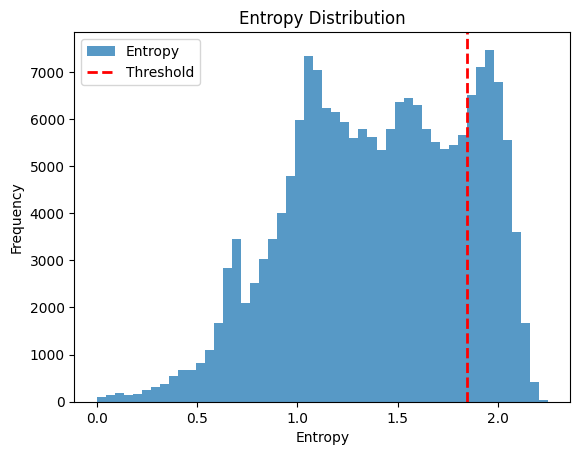

分界值: 1.8463105947018215


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 提取熵值
entropy = result_df['Entropy']

# 计算熵的均值和标准差
entropy_mean = entropy.mean()
entropy_std = entropy.std()
entropy_threshold = entropy_mean + entropy_std

# 绘制熵的分布图
plt.hist(entropy, bins=50, alpha=0.75, label='Entropy')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Entropy Distribution')
plt.axvline(entropy_threshold, color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.legend()
plt.show()

# 可信的预测结果
reliable_predictions = result_df[entropy <= entropy_threshold]

# 输出结果
print(f"分界值: {entropy_threshold}")


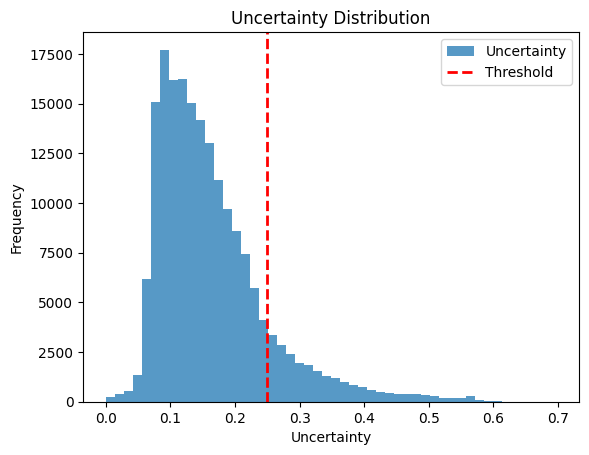

不确定性分界值: 0.2490421285209335


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
uncertainty = result_df['Uncertainty']
# 计算不确定性的均值和标准差
uncertainty_mean = uncertainty.mean()
uncertainty_std = uncertainty.std()
uncertainty_threshold = uncertainty_mean + uncertainty_std

# 绘制不确定性的分布图
plt.hist(uncertainty, bins=50, alpha=0.75, label='Uncertainty')
plt.xlabel('Uncertainty')
plt.ylabel('Frequency')
plt.title('Uncertainty Distribution')
plt.axvline(uncertainty_threshold, color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.legend()
plt.show()

# 可信的预测结果
reliable_predictions = result_df[uncertainty <= uncertainty_threshold]

# 输出结果
print(f"不确定性分界值: {uncertainty_threshold}")


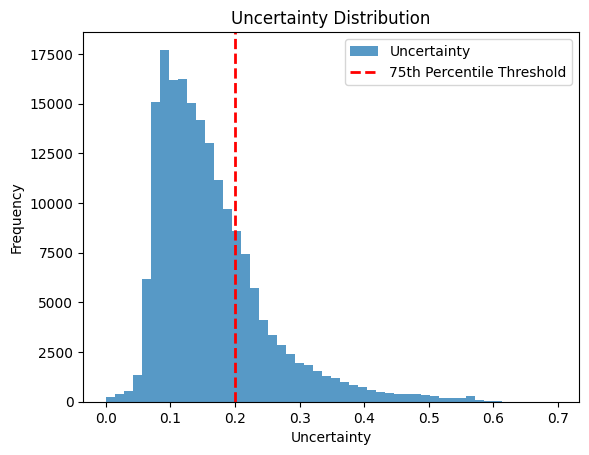

第75百分位数分界值: 0.19942975044250488


In [93]:
# 计算第75百分位数
uncertainty_threshold_75 = np.percentile(uncertainty, 75)

# 绘制不确定性的分布图
plt.hist(uncertainty, bins=50, alpha=0.75, label='Uncertainty')
plt.xlabel('Uncertainty')
plt.ylabel('Frequency')
plt.title('Uncertainty Distribution')
plt.axvline(uncertainty_threshold_75, color='r', linestyle='dashed', linewidth=2, label='75th Percentile Threshold')
plt.legend()
plt.show()

# 可信的预测结果
reliable_predictions_75 = result_df[uncertainty <= uncertainty_threshold_75]

# 输出结果
print(f"第75百分位数分界值: {uncertainty_threshold_75}")